column_list,max_k 수정 후 run all

In [54]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [55]:
df_train = pd.read_csv('../Data/train.csv')

In [56]:
# column_list[1] 기준으로 column_list[0] clustering

column_list = ['business_subarea', 'business_area']

In [57]:
df_filtered = df_train.dropna(subset=[column_list[0]]).query(f"{column_list[0]} != 'Others'")

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9229 entries, 388 to 59154
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              9229 non-null   float64
 1   customer_country         9144 non-null   object 
 2   business_unit            9229 non-null   object 
 3   com_reg_ver_win_rate     4067 non-null   float64
 4   customer_idx             9229 non-null   int64  
 5   customer_type            2475 non-null   object 
 6   enterprise               9229 non-null   object 
 7   historical_existing_cnt  779 non-null    float64
 8   id_strategic_ver         1425 non-null   float64
 9   it_strategic_ver         759 non-null    float64
 10  idit_strategic_ver       2184 non-null   float64
 11  customer_job             9045 non-null   object 
 12  lead_desc_length         9229 non-null   int64  
 13  inquiry_type             9214 non-null   object 
 14  product_category         7

C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

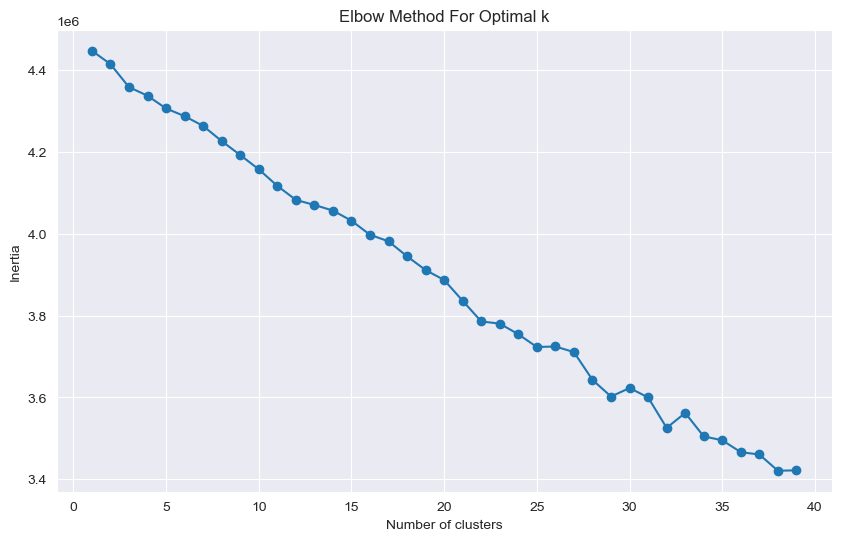

40


In [58]:
# Assuming df is your DataFrame and it's already filtered to exclude 'Others' and NaN in 'business_subarea'
# Step 1: Prepare the data
pivot_table = df_filtered.pivot_table(index=column_list[0], columns=column_list[1], aggfunc=len, fill_value=0)

# Step 2: Normalize the data
scaler = StandardScaler()
pivot_table_scaled = scaler.fit_transform(pivot_table)

# Step 3: Choose the number of clusters (example using the elbow method)
inertia = []
max_k = 40
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pivot_table_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
print(max_k)

C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 3, the average silhouette_score is : 0.5094017435775164


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.03859266885346503


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.20375247874588426


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 6, the average silhouette_score is : 0.33483753292367124


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 7, the average silhouette_score is : 0.15340600538101176


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 8, the average silhouette_score is : -0.12974801296142371


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 9, the average silhouette_score is : 0.048982373729967055


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 10, the average silhouette_score is : 0.16633166752665568


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 11, the average silhouette_score is : 0.33432105016315594


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 12, the average silhouette_score is : -0.04026478233778045


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 13, the average silhouette_score is : 0.23214746035037906


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 14, the average silhouette_score is : -0.08486188013313126


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 15, the average silhouette_score is : -0.16649706376397264


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 16, the average silhouette_score is : 0.13369576343450076


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 17, the average silhouette_score is : 0.043698026396795174


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 18, the average silhouette_score is : -0.26979464440782835


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 19, the average silhouette_score is : -0.2698959898622262


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 20, the average silhouette_score is : 0.1764556944182149


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 21, the average silhouette_score is : 0.0711049929904836


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 22, the average silhouette_score is : 0.2450884377420857


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 23, the average silhouette_score is : 0.19253507887064464


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 24, the average silhouette_score is : 0.2252085353407629


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 25, the average silhouette_score is : 0.033942072362574675


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 26, the average silhouette_score is : 0.2731327834687498


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 27, the average silhouette_score is : 0.07723606296298799


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 28, the average silhouette_score is : 0.13214945787025506


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 29, the average silhouette_score is : 0.19059375848426624


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 30, the average silhouette_score is : -0.2632700604791301


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 31, the average silhouette_score is : 0.25041307209469266


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 32, the average silhouette_score is : -0.23880468603053423


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 33, the average silhouette_score is : 0.08471086498334533


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 34, the average silhouette_score is : -0.14564246304098702


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 35, the average silhouette_score is : 0.1949520054491978


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 36, the average silhouette_score is : -0.026632278474805517


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 37, the average silhouette_score is : -0.2510038536489602


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 38, the average silhouette_score is : 0.09296972210947736


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 39, the average silhouette_score is : 0.10081350765863548


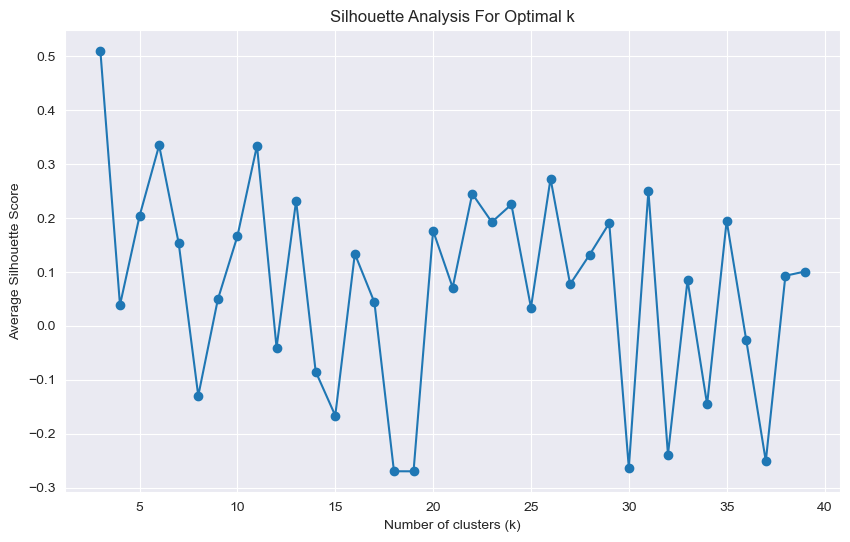

The optimal number of clusters based on silhouette analysis is: 3


In [59]:
# Assuming pivot_table_scaled is your data prepared for clustering
range_n_clusters = list(range(3, max_k))  # Considering a range from 2 to 10 for k
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = clusterer.fit_predict(pivot_table_scaled)
    silhouette_avg = silhouette_score(pivot_table_scaled, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Silhouette Analysis For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

# Choose the k with the highest average silhouette score
optimal_k = range_n_clusters[silhouette_avg_scores.index(max(silhouette_avg_scores))]
print(f"The optimal number of clusters based on silhouette analysis is: {optimal_k}")

In [60]:
# Step 4: Apply clustering
k_optimal = optimal_k  # Example choice, replace with your chosen k based on the plot
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pivot_table_scaled)

# Add the cluster labels to the pivot table
pivot_table['Cluster'] = clusters

# Step 5: Analyze the Results
# You can now examine which business_subarea falls into which cluster
print(pivot_table['Cluster'])

product_modelname
110UM5J          0
110UM5K          0
15LS766F (NA)    0
15LU766A (EU)    0
15LU766A (NA)    0
                ..
WP402            0
WhitePaper       0
all              0
diagnostic       0
full             0
Name: Cluster, Length: 636, dtype: int32


C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [61]:
# Group business_subareas by their cluster and list them
clusters = pivot_table['Cluster'].unique()  # Get unique cluster labels
clustered_subareas = {cluster: [] for cluster in clusters}  # Initialize a dictionary to hold lists of subareas for each cluster

for subarea, cluster in pivot_table['Cluster'].items():
    clustered_subareas[cluster].append(subarea)  # Append the subarea to the corresponding cluster list

# Print the elements of the same cluster
for cluster, subareas in clustered_subareas.items():
    print(f"Cluster {cluster}: {', '.join(subareas)}")

Cluster 0: 110UM5J, 110UM5K, 15LS766F (NA), 15LU766A (EU), 15LU766A (NA), 16T90P, 16Z90P, 17HK700G/17HQ701G, 17Z90P, 19HK312C, 21HQ513D, 22SM3G, 22SM3G-B, 22XE1J-B, 23SE3TE, 24CK560N, 24CN670N-6N, 24LT572M (NA), 24LT661H (EU), 27BN85U, 27EP950, 27GL650F, 27GQ50F, 27HJ713C, 27HK510S, 27KC3PK-C, 27TNF3K, 27UP650, 28MQ780, 31HN713D, 31HN713D-B, 32HL512D-B, 32BP95E, 32HL512D, 32HL714S, 32LS341H (EU Only), 32LT330H (Brazil Only), 32LT340C, 32LT340C (ASIA), 32LT340C (CIS), 32LT340C (EU), 32LT340C (NA), 32LT340H (Colombia), 32LT340H (MEA), 32LT340H (NA), 32LT341H (CIS), 32LT560H (NA), 32LT572M (NA), 32LT660H (ASIA), 32LT661H (CIS), 32LT661H (EU), 32LT662M (NA), 32LU640H, 32LU640S, 32LV303C (INDIA), 32SM5J, 32SM5J-B, 32SM5KE-B, 32SP510M, 32TA3E, 32TNF5J, 32UL950, 32UN880, 34WP500, 35WN75C, 38CL950, 38CL950P, 38WP85C, 43HT3WJ, 43LT340C, 43LT340C (CIS), 43LT340C (EU), 43LT340H (MEA), 43LT340H (NA), 43LT341H (CIS), 43LT341H (EU), 43LT560H (NA), 43LT570H (NA), 43LT572M (NA), 43ML5K, 43SE3KE-B, 43S

In [62]:
# Assuming df_cleaned is your DataFrame after excluding 'Others' from 'business_subarea' and dropping NaN values
df_cleaned = df_train.dropna(subset=[column_list[1], column_list[0]])

# Group by 'business_area' and aggregate unique 'business_subarea's
mapping = df_cleaned.groupby(column_list[1])[column_list[0]].unique()

# Convert the aggregated arrays to lists (for better readability) and sort them
mapping = mapping.apply(lambda x: sorted(list(x)))

# Print the mapping relationship
for area, subareas in mapping.items():
    print(f"[{area}]: {', '.join(subareas)}")

[0.44mm EVEN BEZEL VIDEO WALL]: LG UltraWide™
[0.44mm Even Bezel Video Wall]: 55SVH7F, 55SVM5F-H
[0.9mm Even Bezel Video Wall]: 49VH7E, 55VH7E, 55VH7E-H, 55VH7J-H, 55VM5E
[49" 500 nits FHD Slim Bezel Video Wall]: 110UM5J, 49VL5G, 49VL5G-M, 49VL5PJ
[4K UHD Hospitality TV with Pro:Centric Direct]: 43US660H (NA), 50UR760H (NA), 50UR761H (ASIA), 50UR761H (LATAM), 50UR762H (EU/CIS), 50UR762H (MEA), 50UR765H (ASIA), 50UR770H (NA), 50US660H (NA), 55UR567H (NA), 55UR761H (ASIA), 55UR761H (LATAM), 55UR762H (EU/CIS), 55UR762H (MEA), 55UR765H (ASIA), 55UR770H (NA), 55US660H (NA), 65UR567H (NA), 65UR762H (EU/CIS), 65UR762H (MEA), 65UR765H (ASIA), 65UR767H (EU), 65UR770H (NA), 65UR777H (NA), 75UR761H (ASIA), 75UR761H (LATAM), 75UR762H (EU/CIS), 75UR762H (MEA), 75UR765H (ASIA), 75UR770H (NA)
[4K UHD Smart TV]: 43UQ801C (INDIA), 50UQ751C (EU/CIS), 50UQ751C (MEA), 50UQ801C (INDIA), 50UQ801C (MEA), 55UQ751C (EU/CIS), 55UQ801C (INDIA), 55UQ801C (MEA), 65UQ801C (ASIA), 65UQ801C (INDIA), 65UQ801C (MEA), 7

C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\jku95\AppData\Local\Temp\ipykernel_33920\2547003341.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pivot_table_2d[cluster_labels == i, 0], pivot_table_2d[cluster_labels == i, 1],


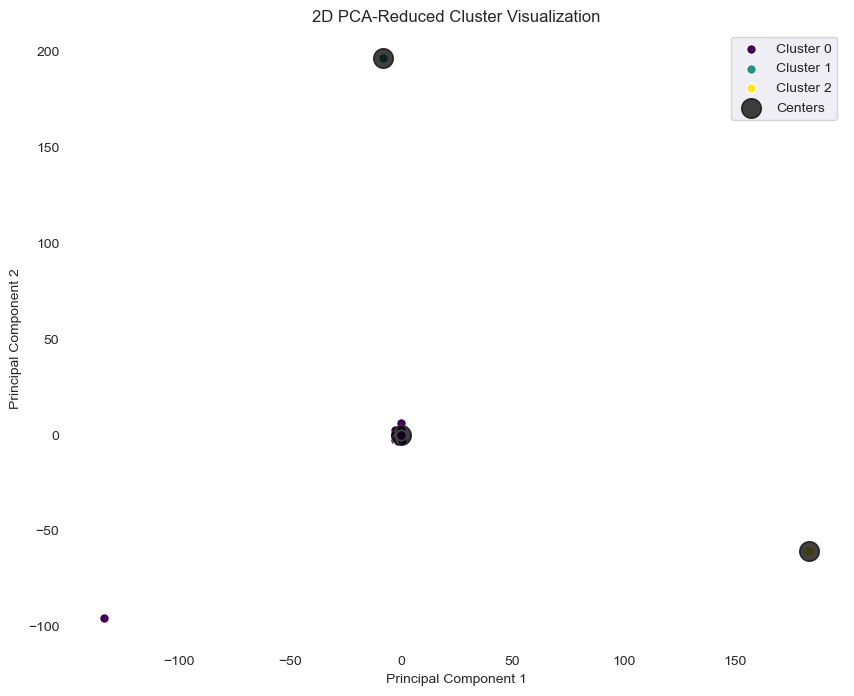

In [63]:
# PCA를 사용하여 데이터를 2차원으로 줄임
pca = PCA(n_components=2)
pivot_table_2d = pca.fit_transform(pivot_table_scaled)

# KMeans 클러스터링을 다시 수행하여 2차원 데이터에 대한 클러스터 레이블을 얻음
clusterer = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = clusterer.fit_predict(pivot_table_2d)

# 클러스터링 결과를 시각화
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))

# 각 클러스터마다의 데이터 포인트를 그림
for i, color in zip(range(optimal_k), colors):
    plt.scatter(pivot_table_2d[cluster_labels == i, 0], pivot_table_2d[cluster_labels == i, 1],
                c=color, label=f'Cluster {i}', marker='o', edgecolor='w', s=50)

# 클러스터 중심을 그래프에 표시
centers = clusterer.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, label='Centers')

# 범례 추가
plt.legend(loc='best')

# 격자 제거 및 배경색 설정
plt.grid(False)  # 격자 제거
plt.gca().set_facecolor('white')  # 배경색을 흰색으로 설정
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.title('2D PCA-Reduced Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\jku95\anaconda3\envs\Aimers\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


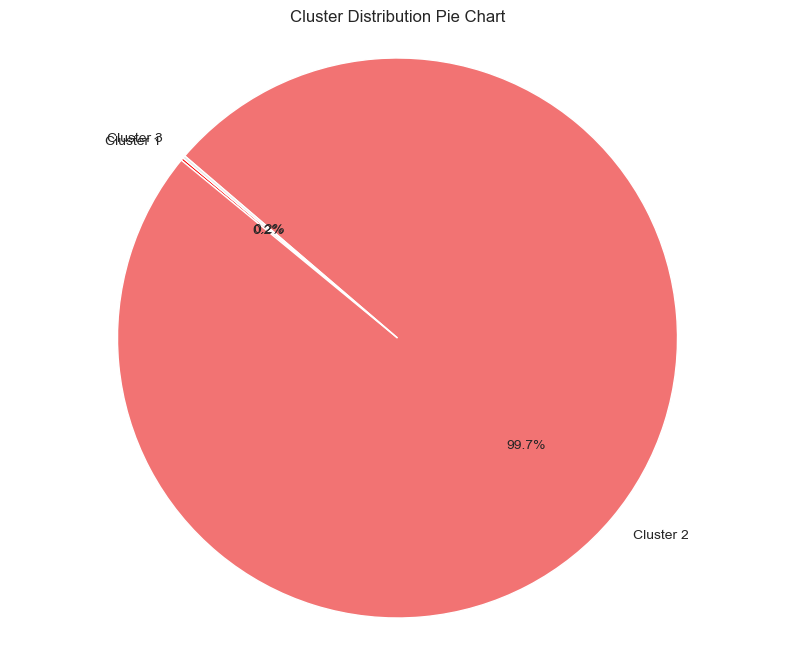

In [64]:
# KMeans 클러스터링 수행
clusterer = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = clusterer.fit_predict(pivot_table_scaled)

# 클러스터링 결과에서 각 클러스터의 데이터 포인트 수 계산
cluster_counts = Counter(cluster_labels)

# 원그래프 준비
sizes = [cluster_counts[i] for i in range(optimal_k)]
labels = [f'Cluster {i+1}' for i in range(optimal_k)]

# 사용자 정의 컬러맵 생성 (붉은색에서 연한 회색으로)
colors = [(1, 0, 0), (0.9, 0.9, 0.9)]  # 붉은색에서 연한 회색까지
n_bins = [3]  # 필요한 색상 수만큼 구간을 정의
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=optimal_k)

# 원그래프 그리기
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=cm(np.linspace(0, 1, optimal_k)), autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 원그래프가 원형으로 보이도록 설정
plt.title('Cluster Distribution Pie Chart')
plt.show()